In [ ]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"

--2023-05-18 11:54:32--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.65.227.25, 18.65.227.110, 18.65.227.27, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.65.227.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  --.-KB/s    in 0.05s   

2023-05-18 11:54:32 (67.0 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading Data set from CSV
df = pd.read_csv("netflix.csv")
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
#Gathering information about the data like no. of rows, columns, datatypes, null values etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# checkin info related to continous data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# checkin info related to catagorical data
df.describe(include="object").T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [ ]:
#no. of unique values in the data set
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
#shape of the data
df.shape

(8807, 12)

In [ ]:
#checking datatypes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#checking for percentage of null values in every column
df.isna().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
#count of each type of rating
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
#unnesting the directors column
dir_split = df["director"].apply(lambda x: str(x).split(', ')).tolist()
df_dir_split = pd.DataFrame(dir_split, index=df["title"]).stack().reset_index()
df_dir_split.drop(["level_1"], axis=1, inplace=True)
df_dir_split.rename(columns={0:'director'}, inplace=True)
df_dir_split.tail()

,title,director
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt
9611,Zubaan,Mozez Singh


In [ ]:
#unnesting the cast column
cast_split = df["cast"].apply(lambda x: str(x).split(', ')).tolist()
df_cast_split = pd.DataFrame(cast_split, index=df['title']).stack().reset_index()
df_cast_split.drop(['level_1'], axis=1, inplace=True)
df_cast_split.rename(columns={0:"cast"}, inplace=True)
df_cast_split.head()

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
#unnesting the listed_in column
genre_split = df["listed_in"].apply(lambda x: str(x).split(', ')).tolist()
df_genre_split = pd.DataFrame(genre_split, index=df["title"]).stack().reset_index()
df_genre_split.drop(['level_1'], axis=1, inplace=True)
df_genre_split.rename(columns={0:'genre'}, inplace=True)
df_genre_split.head()

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
#unnesting the country column
country_split = df['country'].apply(lambda x:str(x).split(', ')).tolist()
df_country_split = pd.DataFrame(country_split, index=df['title']).stack().reset_index()
df_country_split.drop(['level_1'], axis=1, inplace=True)
df_country_split.rename(columns={0:'country'}, inplace=True)
df_country_split.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [ ]:
#merging the unnested Data Frames with each other
df_1 = df_dir_split.merge(df_cast_split, on="title", how='inner')
df_2 = df_1.merge(df_genre_split, on='title', how='inner')
df_3 = df_2.merge(df_country_split, on='title', how='inner')


In [ ]:
df_3.head()

,title,director,cast,genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa


In [ ]:
#replacing 'nan' with something meaningful
df_3['cast'].replace('nan', 'Unknown Actor', inplace=True)
df_3['director'].replace('nan', 'Unknown Director', inplace=True)
df_3["country"].replace('nan', np.nan, inplace=True)

In [ ]:
df_3.head()

,title,director,cast,genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa


In [ ]:
#merging the unnested data with the original data
data = df_3.merge(df[['show_id', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration']],on=['title'],how='left')
#data.tail()

## on further examining the new data after merging i found that duration column has 3 null values because the value of duration for those rows are somehow present inside rating column

In [ ]:
data.isna().sum()

title               0
director            0
cast                0
genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [ ]:
data.loc[data['duration'].isnull(),'duration']

126537    NaN
131603    NaN
131737    NaN
Name: duration, dtype: object

In [ ]:
data.loc[[126537, 131603,  131737], 'rating']

126537    74 min
131603    84 min
131737    66 min
Name: rating, dtype: object

In [ ]:
data.loc[data['duration'].isna(), 'duration'] = data.loc[data['duration'].isna(), 'duration'].fillna(data.loc[data['duration'].isna(), 'rating'])

#replacing the incorrect data present in rating column with 'Not Rated'
data.loc[data['rating'].str.contains('min', na=False),'rating'] = 'NR'

In [ ]:
data.isna().sum()

title               0
director            0
cast                0
genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [ ]:
#Trying to get rid of null values from the Data Frame

#Rating column has 67 null values so replacing those values with NR
data.loc[data['rating'].isna(), 'rating'] = 'NR'

In [ ]:
# filling null values of ['date_added'] & ['rating'] with No Data

data['date_added'].fillna('No Data',inplace=True)
data['rating'].fillna('No Data',inplace=True)

In [ ]:
# filling null values for country based on director

for i in data[data['country'].isnull()]['director'].unique():
  if i in data[~data['country'].isnull()]['director'].unique():
    imp=data[data['director']==i]['country'].mode().values[0]
    data.loc[data['director']==i,'country']=data.loc[data['director']==i,'country'].fillna(imp)

In [ ]:
data.isna().sum()

title              0
director           0
cast               0
genre              0
country         4276
show_id            0
type               0
date_added         0
release_year       0
rating             0
duration           0
dtype: int64

In [ ]:
#filling the leftover null values in country with No Data
data['country'].fillna('No Data',inplace=True)

In [ ]:
data.isna().sum()

title           0
director        0
cast            0
genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [ ]:
data.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


<Axes: ylabel='type'>

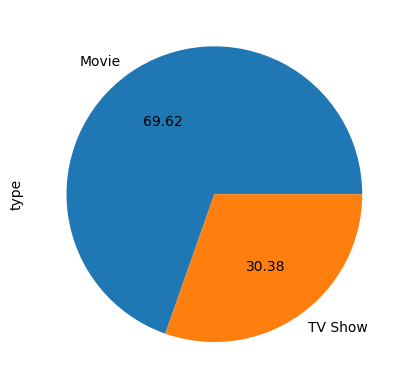

In [ ]:
df["type"].value_counts().plot(kind='pie',autopct='%0.2f')

## The ratio of Movies and TV Shows is 70:30  

In [ ]:
data['duration']=data['duration'].str.replace(" min","")
data['duration_cut']=data['duration'].copy()
data1=data.copy()
data1.loc[data1['duration_cut'].str.contains('Season'),'duration_cut']=0
data1['duration_cut']=data1['duration_cut'].astype('int')
data1.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration,duration_cut
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


<ipython-input-35-af93ef09563f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1["duration_cut"], hist=True, kde=True, hist_kws={'edgecolor':'black'}, bins=int(36))


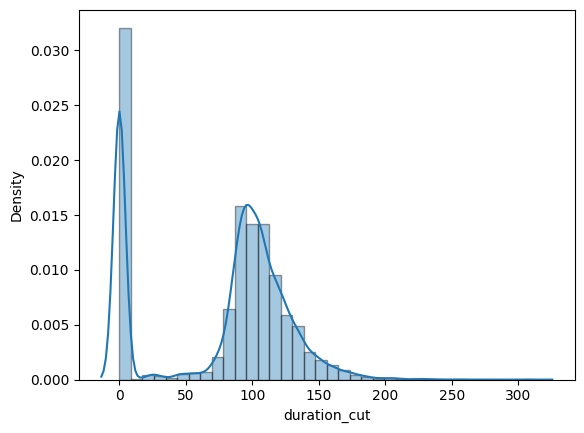

In [ ]:
sns.distplot(data1["duration_cut"], hist=True, kde=True, hist_kws={'edgecolor':'black'}, bins=int(36))
plt.show()

In [ ]:
b = [-1,1,50,80,100,120,150,200,315]
lab = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
data1['duration_cut'] = pd.cut(data1['duration_cut'],bins=b,labels=lab)
data1.loc[~data1['duration'].str.contains('Season'),'duration']=data1.loc[~data1['duration'].str.contains('Season'),'duration_cut']
data1.drop(['duration_cut'],axis=1,inplace=True)
data1.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


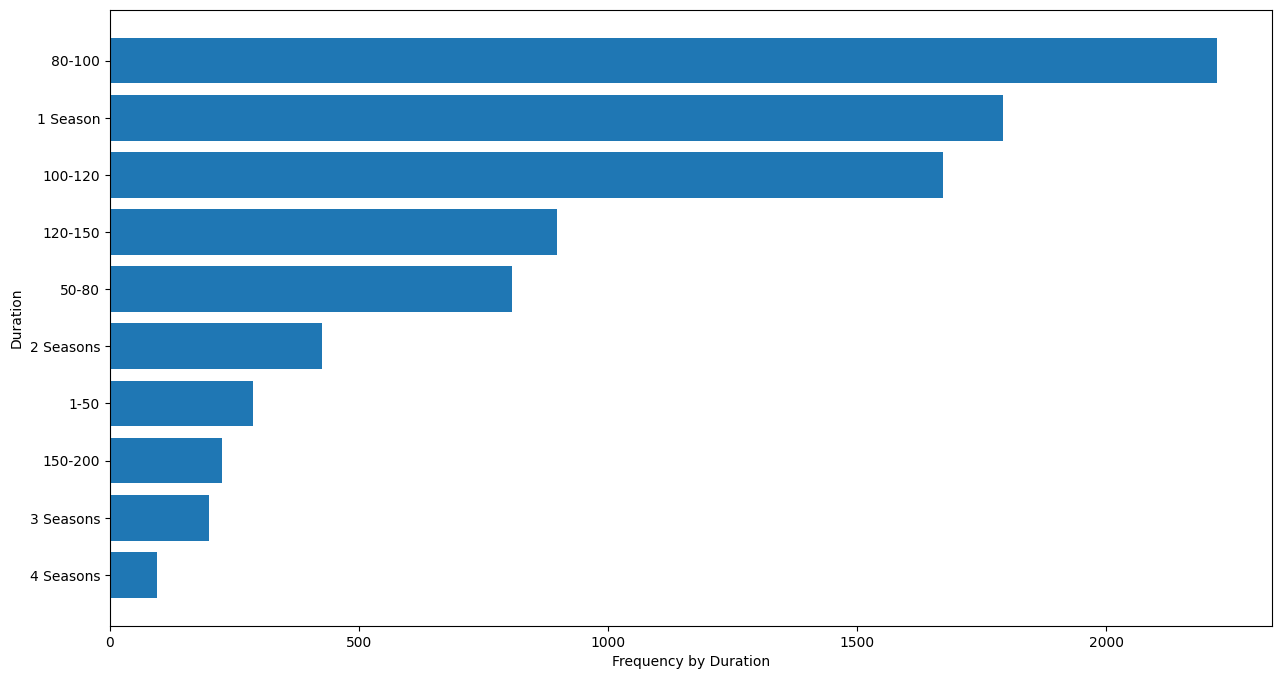

In [ ]:
df_duration=data1.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

## The duration of Most Watched content in our whole data is 80-100 mins.These must be movies and Shows having only 1 Season.

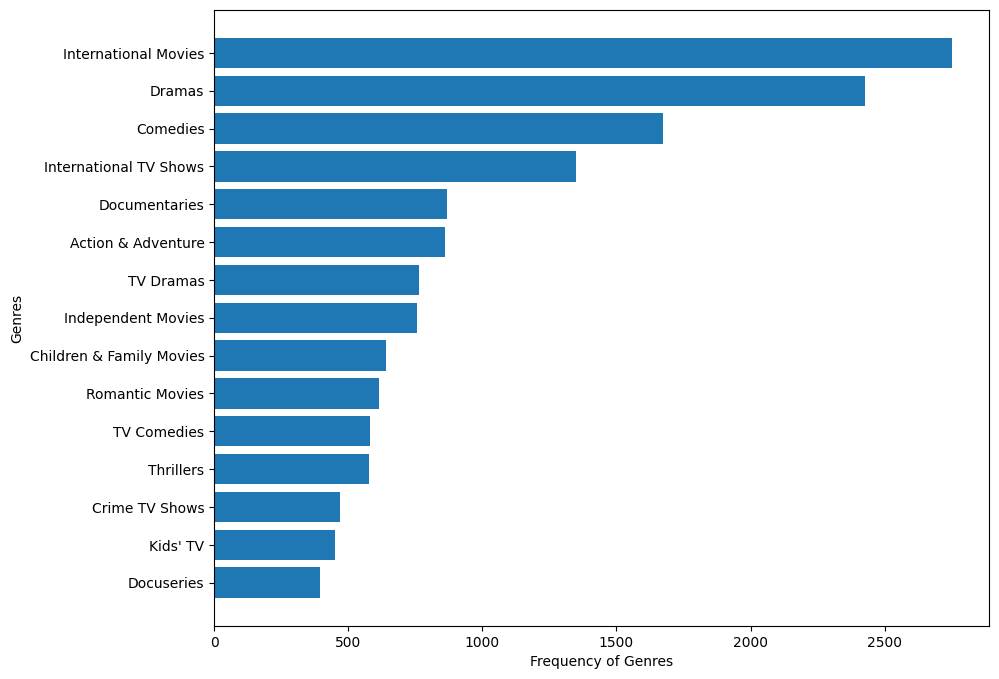

In [ ]:
df_genre = data1.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'], ascending= False)[:15]
plt.figure(figsize=(10,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

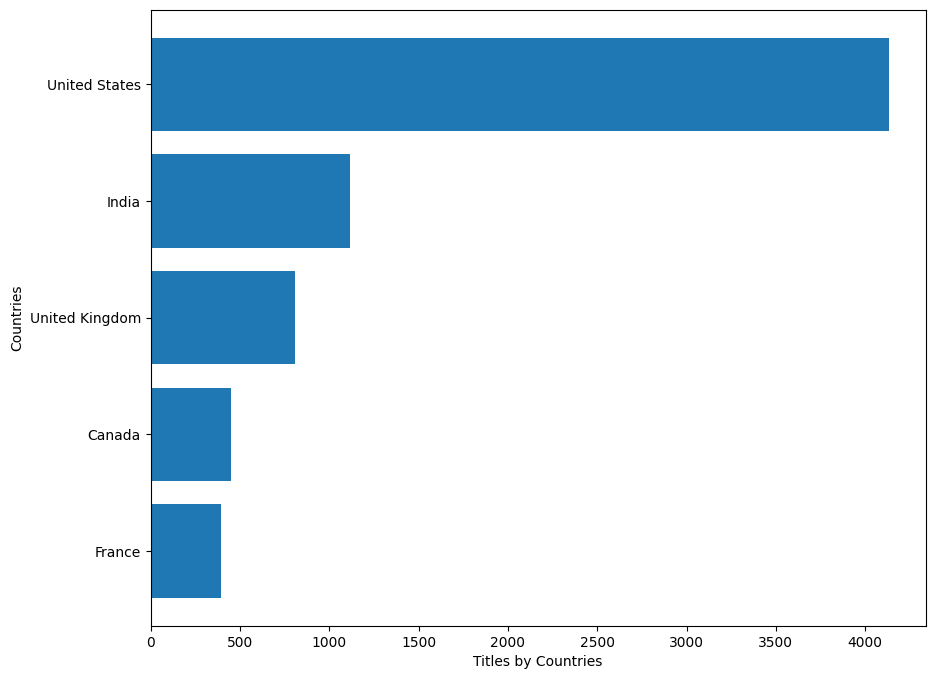

In [ ]:
df_country=data1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(10,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

# US, India, UK, Canada and France are countries where Netflix is most popular

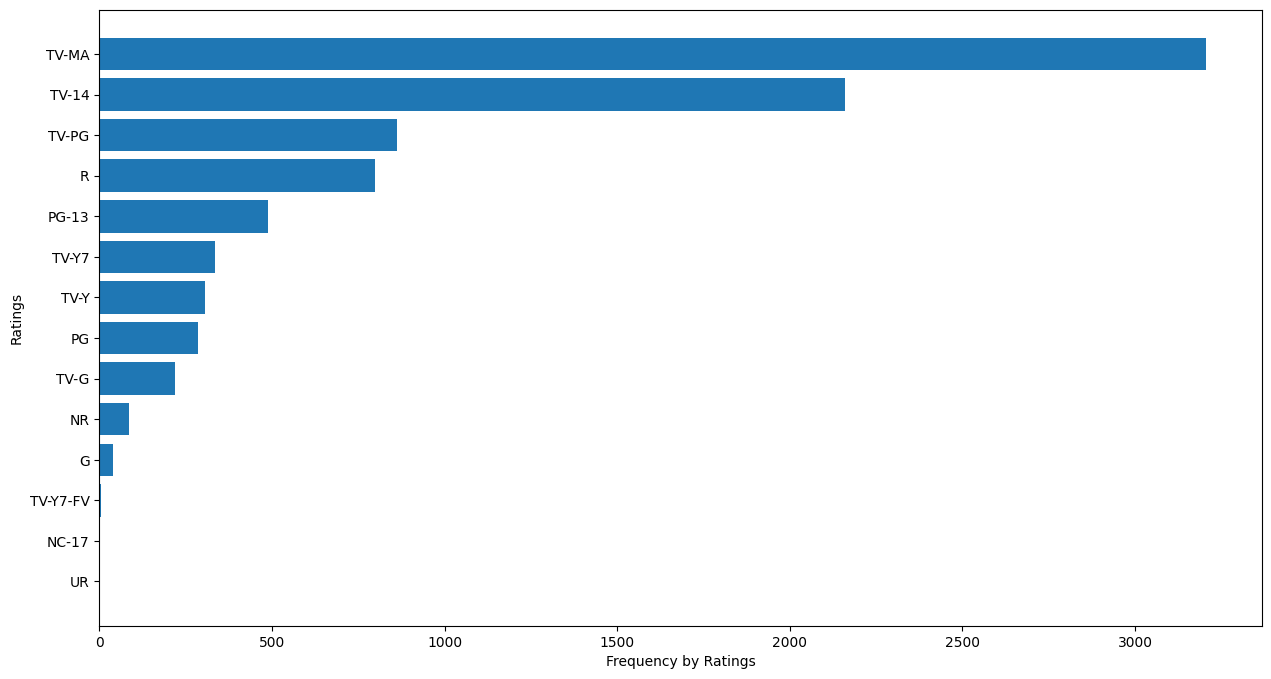

In [ ]:
df_rating=data1.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

## Netflix mostly has content for Mature Audiences

In [ ]:
data.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration,duration_cut
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.dropna(subset=['date_added'], inplace=True)
df['month_added'] = df['date_added'].dt.month
df['week_added']=df['date_added'].dt.week
df['year_added']=df['date_added'].dt.year

<ipython-input-42-faed9ef35c88>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_added']=df['date_added'].dt.week


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,week_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,38,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,38,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,38,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,38,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,38,2021


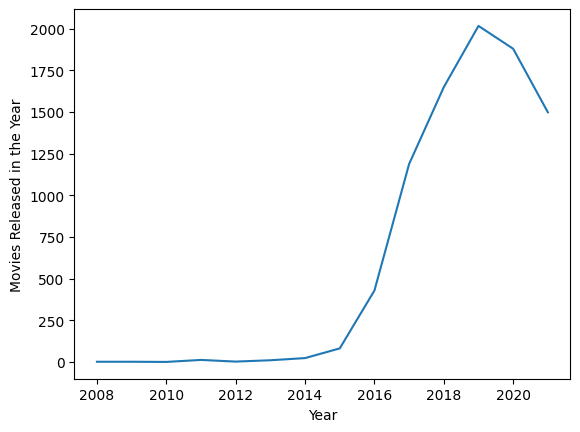

In [ ]:
#number of distinct titles on the basis of year
df_year=df.groupby(['year_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year_added', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

## The Amount of Content across Netflix has increased from 2000 continuously till 2019. Then started decreasing (probably due to Covid)

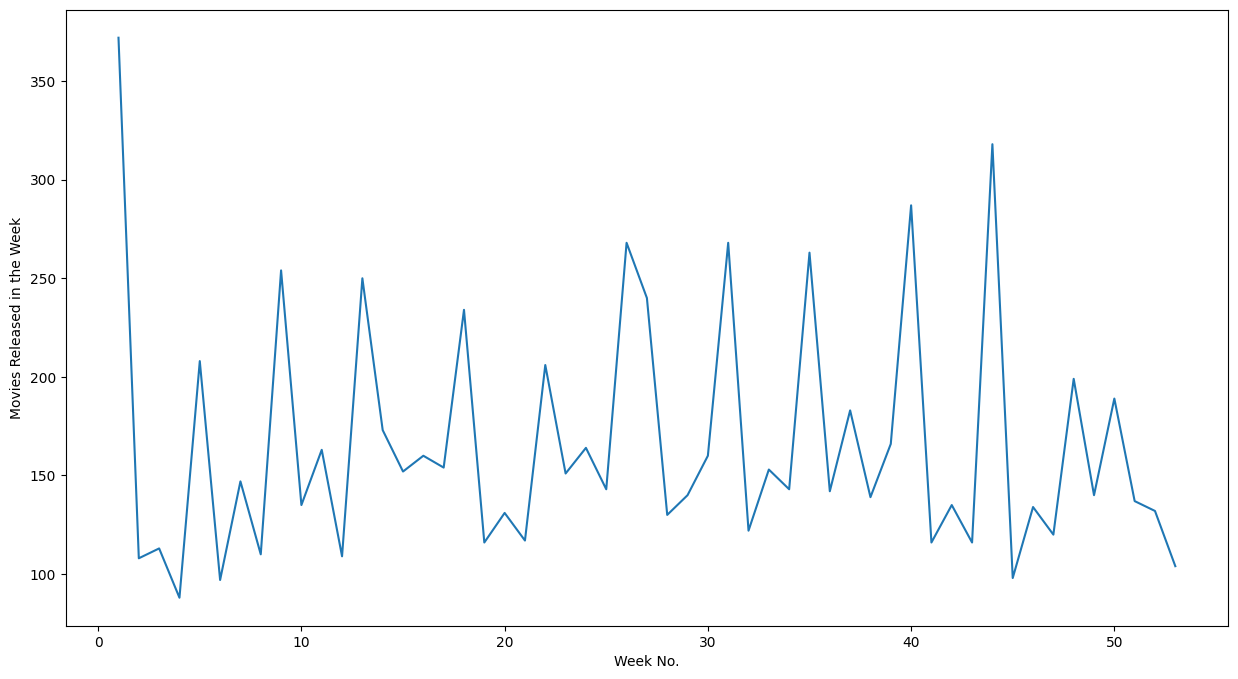

In [ ]:
#number of distinct titles on the basis of week

df_week=df.groupby(['week_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

## Most of the Content across Netflix is added in the first week of the year and it follows a bit of a cyclical pattern

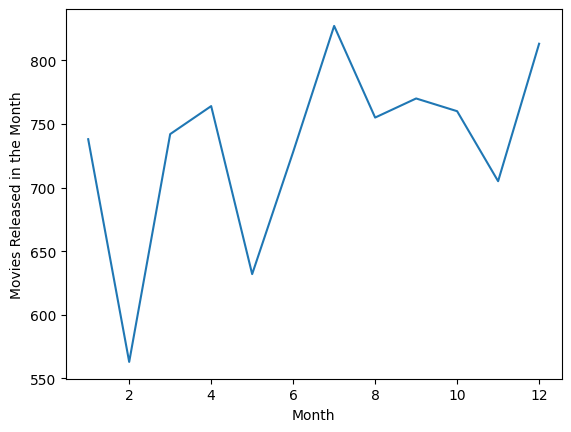

In [ ]:
#number of distinct titles on the basis of week
df_month=df.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

## Most of the content is added in the first and last months across Netflix(reinstating what we observed for first week in baove plot )

## Univariate Analysis separately for shows and movies

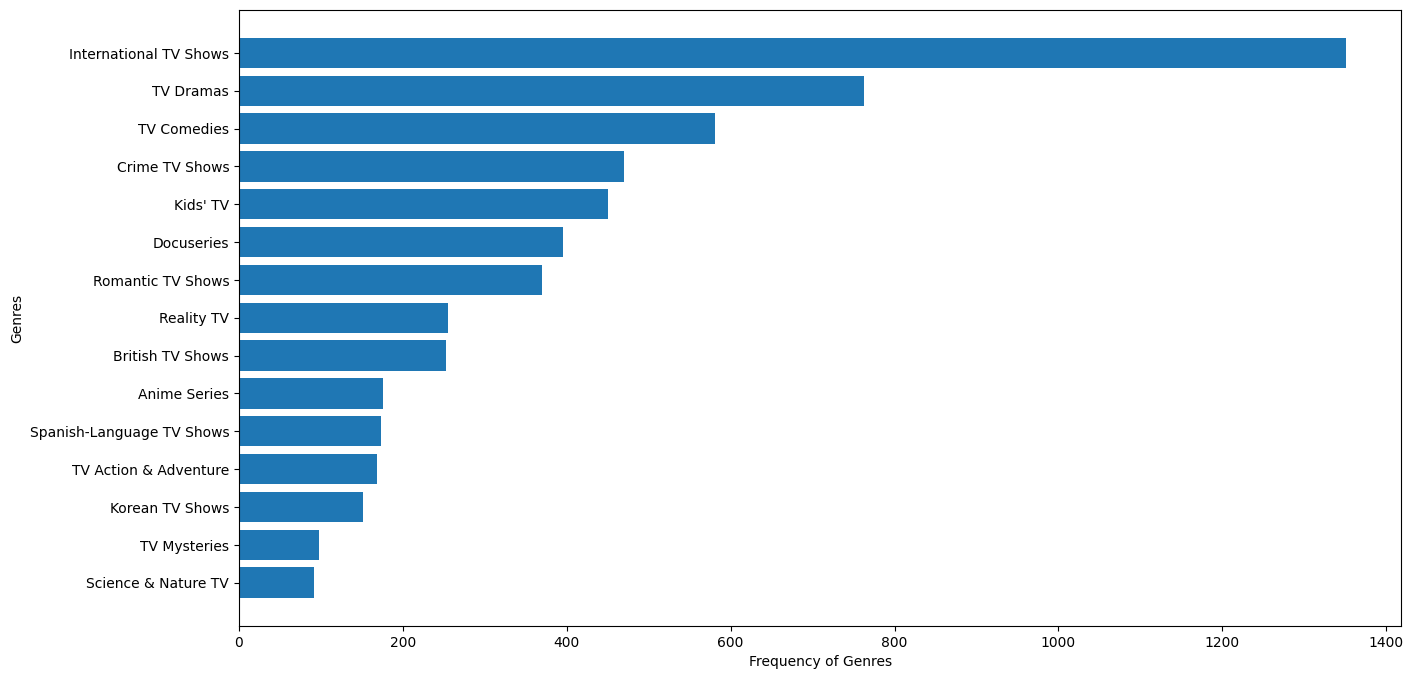

In [ ]:
df_shows=data1[data1['type']=='TV Show']
df_movies=data1[data1['type']=='Movie']
df_genre=df_shows.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

## International TV Shows, Dramas and Comedy Genres are popular across TV Shows in Netflix

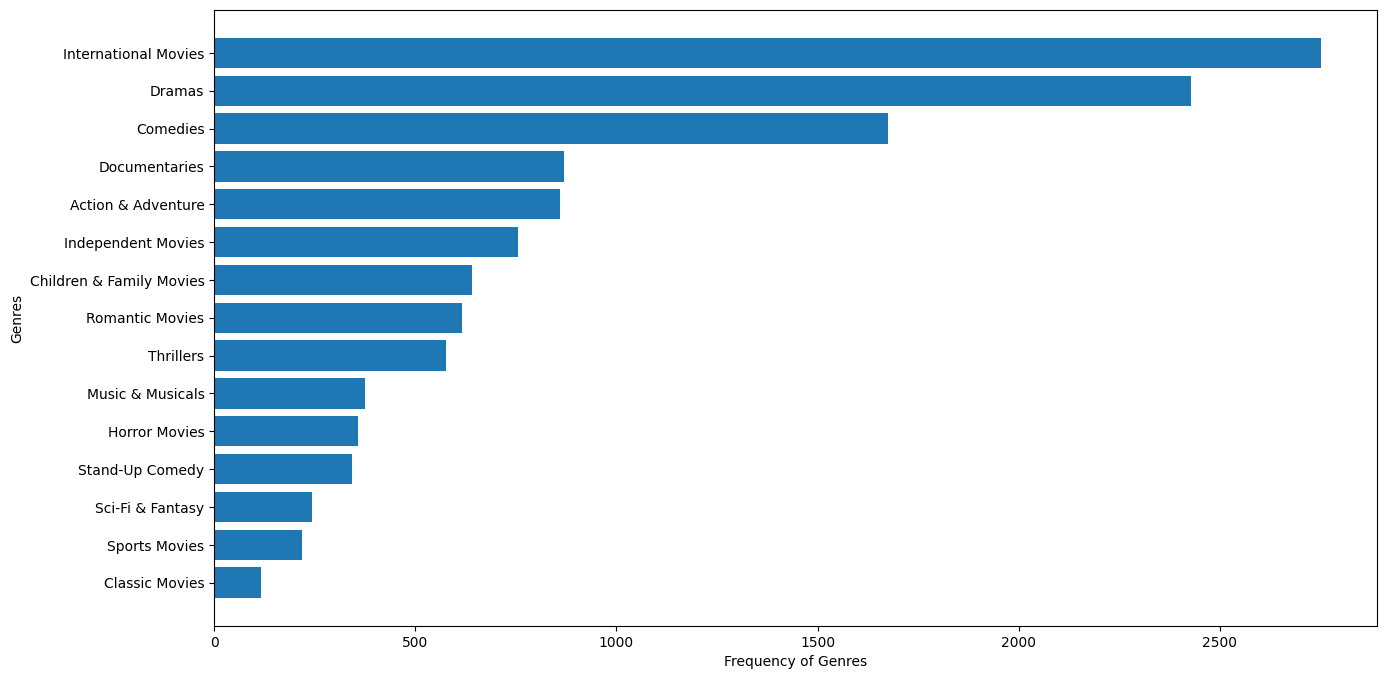

In [ ]:
df_genre=df_movies.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

## International Movies, Dramas and Comedy Genres are popular followed by Documentaries across Movies on Netflix

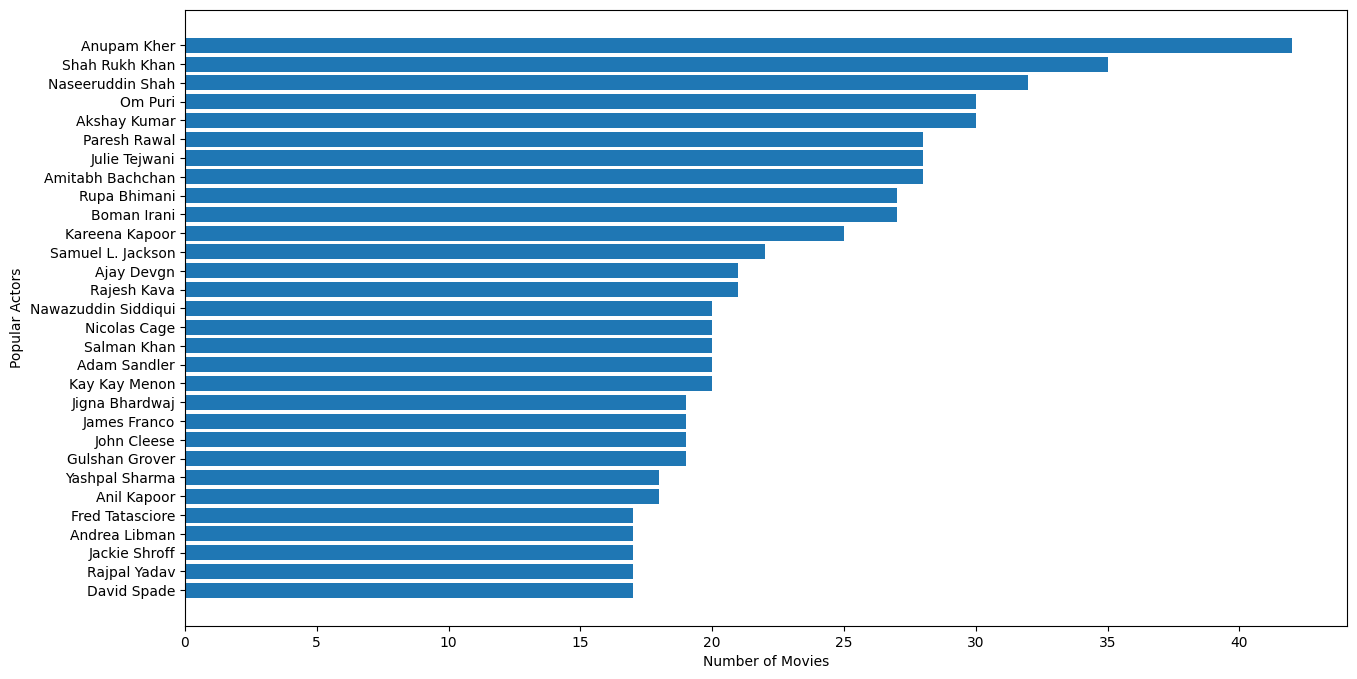

In [ ]:
df_actors=df_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()


## Our bollywood actors such as Anupam Kher, SRK, Naseeruddin Shah are very much popular acrossmovies on Netflix

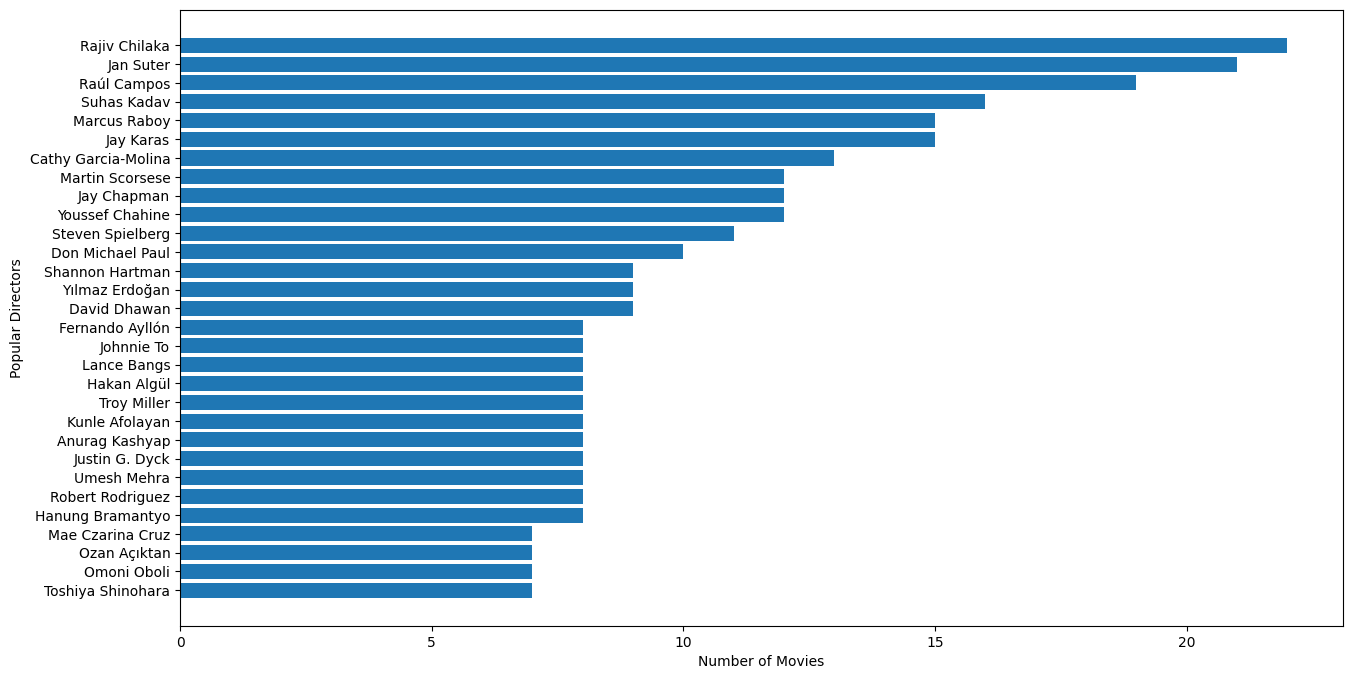

In [ ]:
df_directors=df_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

## Rajiv Chilka, Jan Suter, Raul Campos, Suhas Kadav are popular directors across movies

## Univariate Analysis separately for shows and movies in USA

In [ ]:
#Analyzing both shows and movies for India
df_shows_india=data1[data1['country']=='India'][data1[data1['country']=='India']['type']=='TV Show']
df_movies_india=data1[data1['country']=='India'][data1[data1['country']=='India']['type']=='Movie']

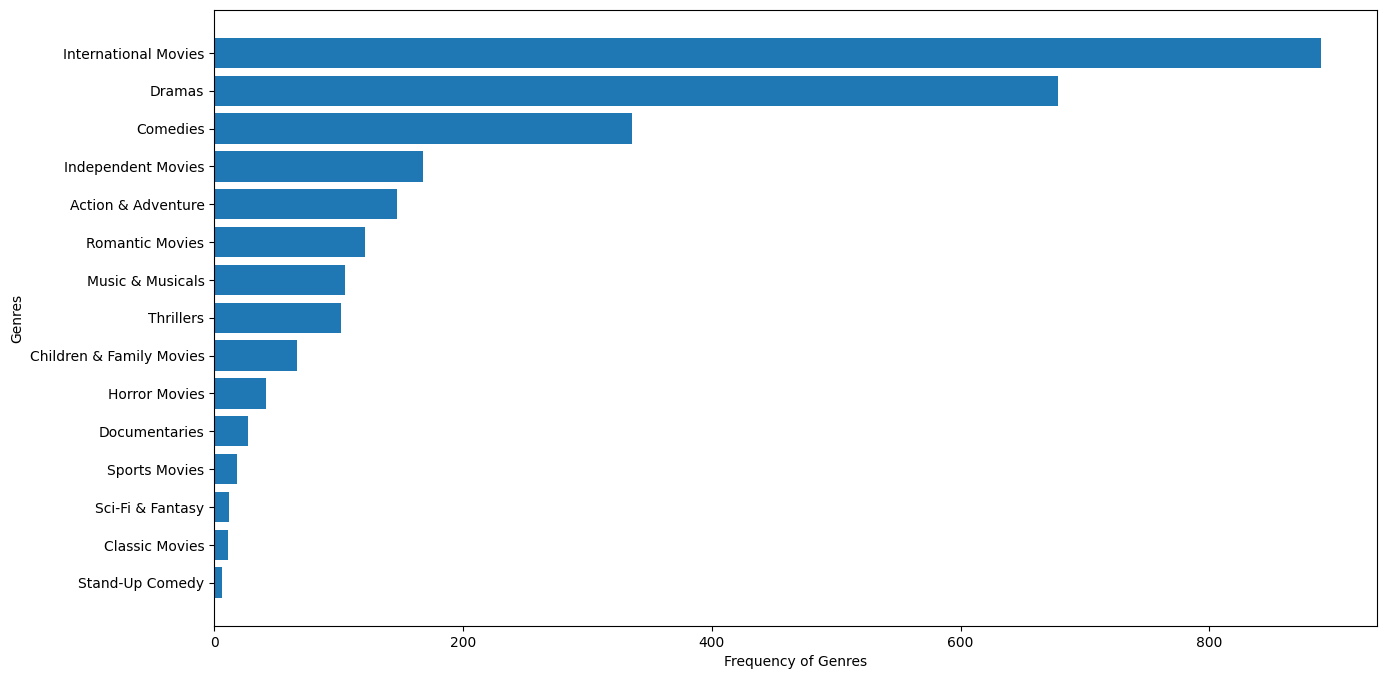

In [ ]:
df_genre=df_movies_india.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

## Most popular Genre in Movies are International Movies, Drama, Comedies, Indedpendant Movies, action and adventure

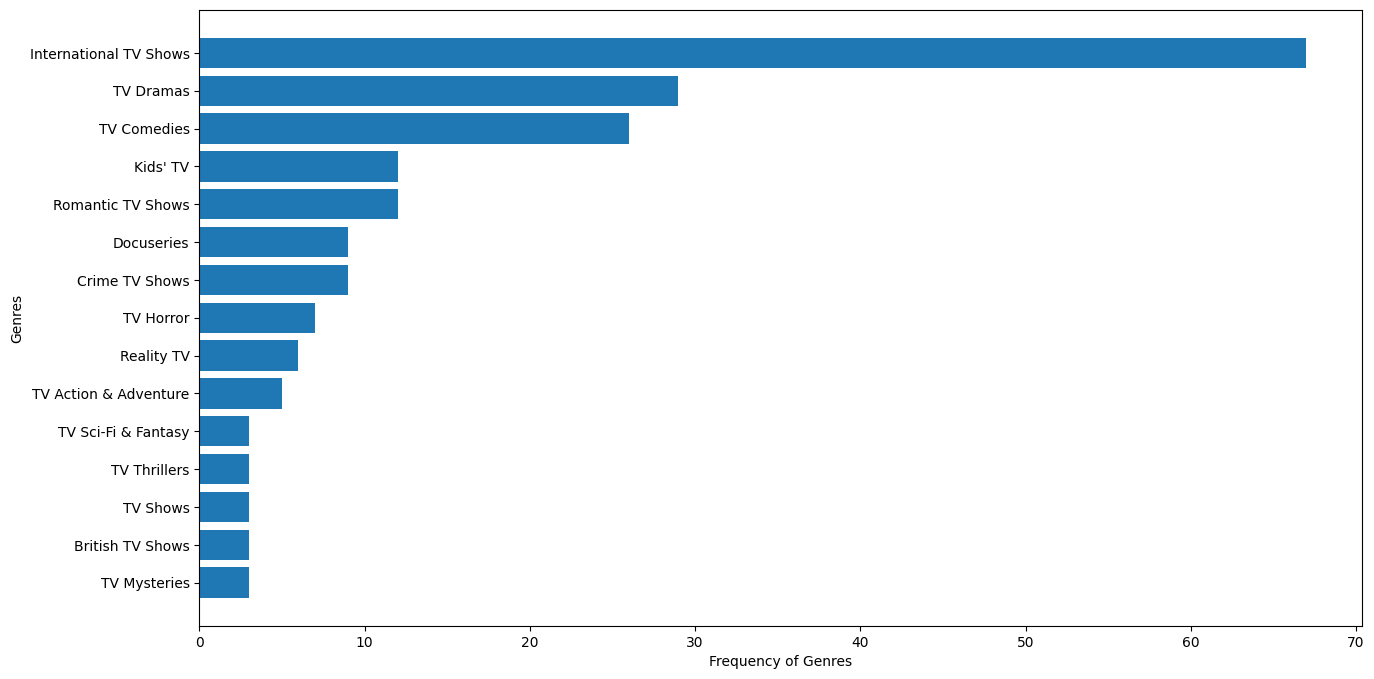

In [ ]:
df_genre=df_shows_india.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

## Most popular Genre for TV shows in India are International TV Shows, TV Dramas, TV Comedies, Kid's TV and Romantic TV Shows

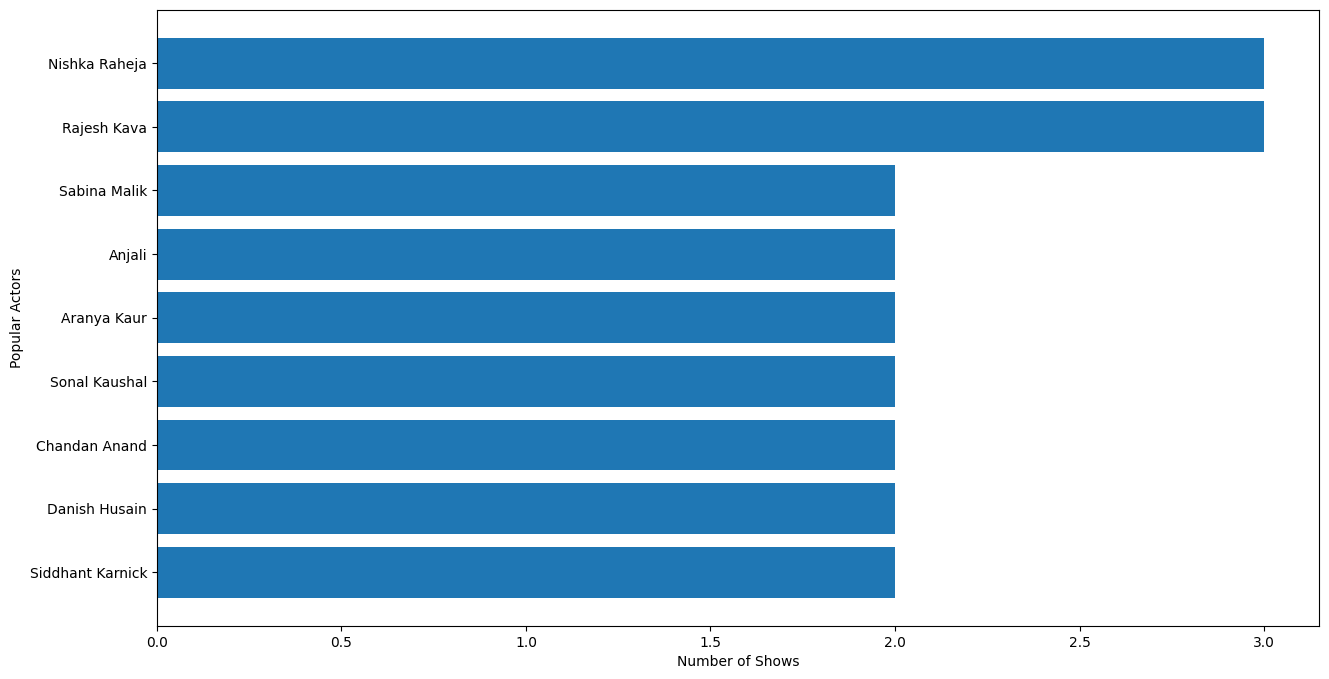

In [ ]:
df_actors=df_shows_india.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

## Nishka Raheja amd Rajesh Kava are most popular actors in TV Shows

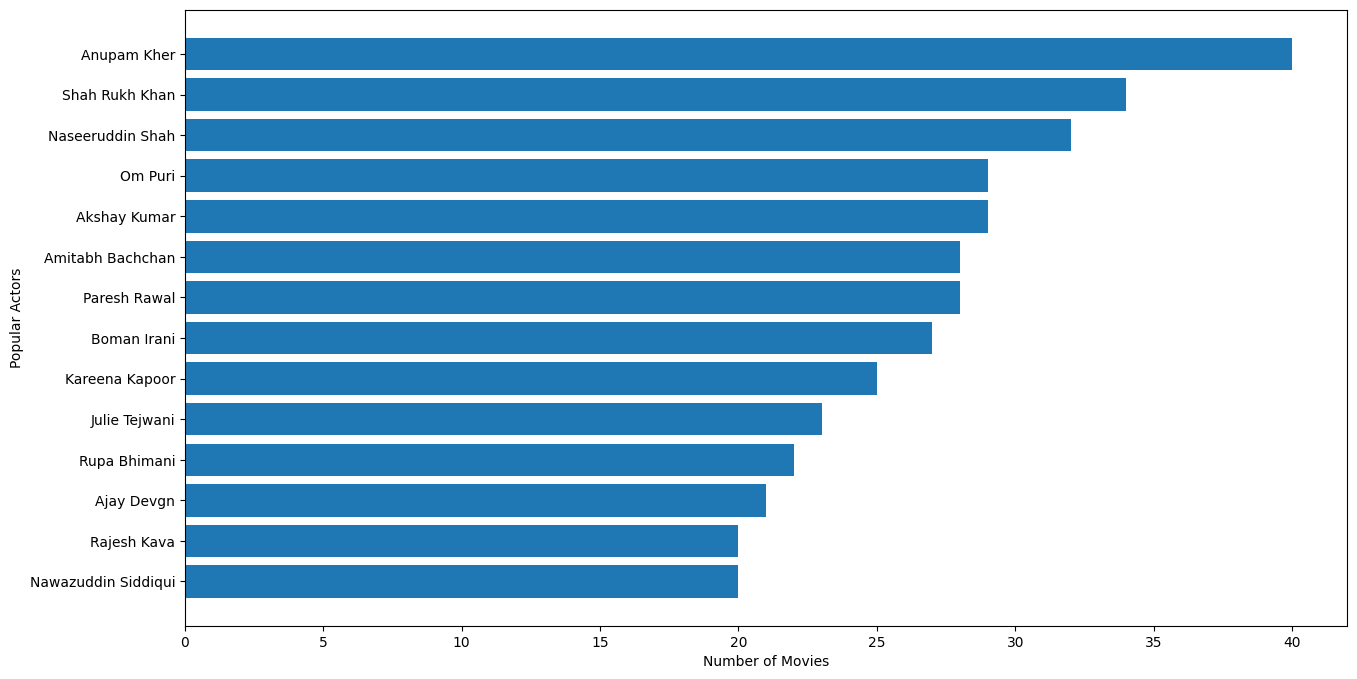

In [ ]:
df_actors=df_movies_india.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

## Anupam Kher, ShahRukh Khan, Naseeruddin Shah, Om Puri, Akshay Kumar are most popular indian actors when it comes to movies

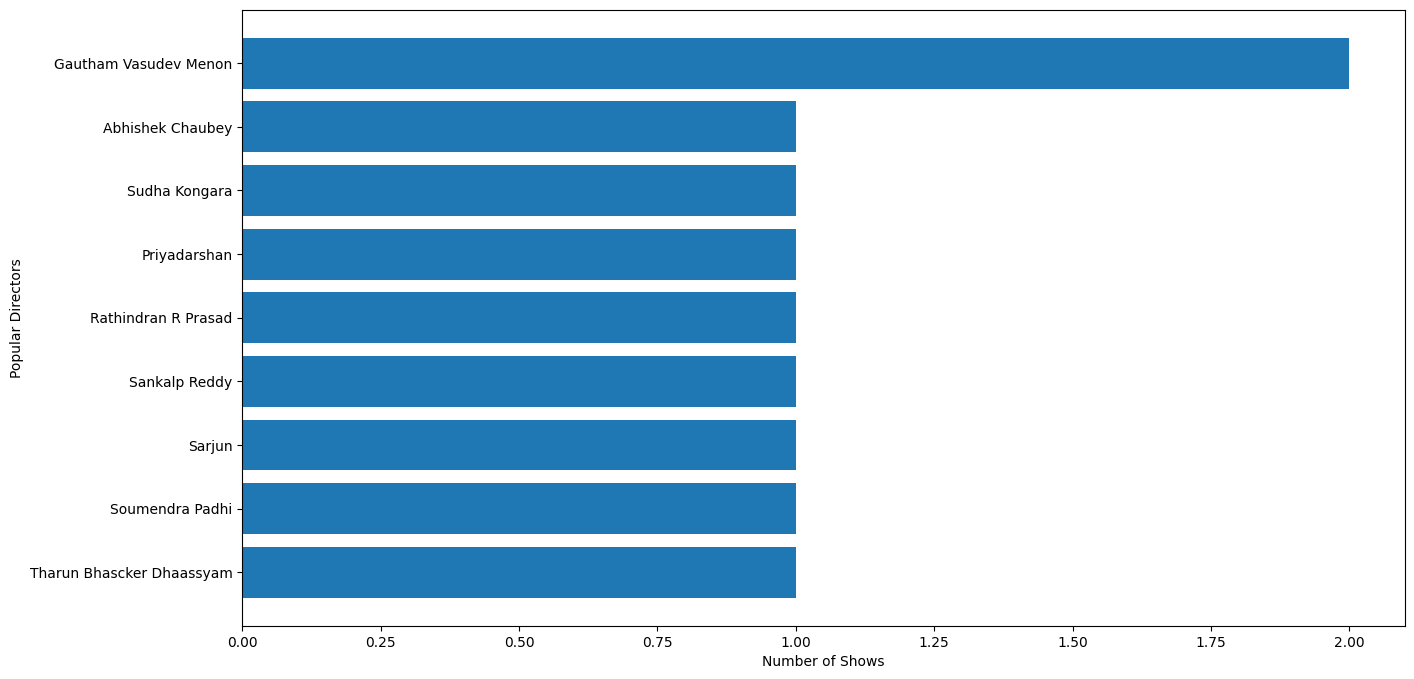

In [ ]:
df_directors=df_shows_india.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Directors')
plt.show()

## Gautham vasudev Menon is the most popular TV show director in India

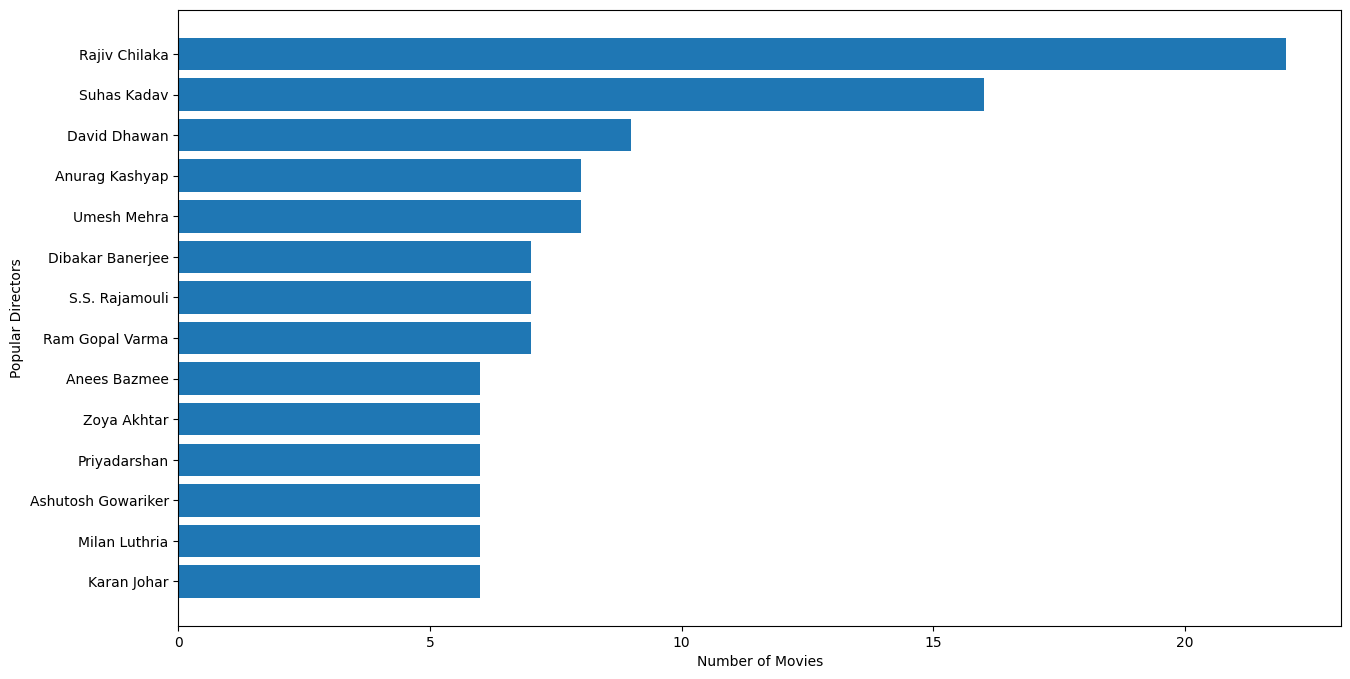

In [ ]:
df_directors=df_movies_india.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

## Rajeev Chilaka, Suhas Kadav, David Dhawan are amongst the most popular Indian Movie Directors

Text(0.5, 0, 'Year')

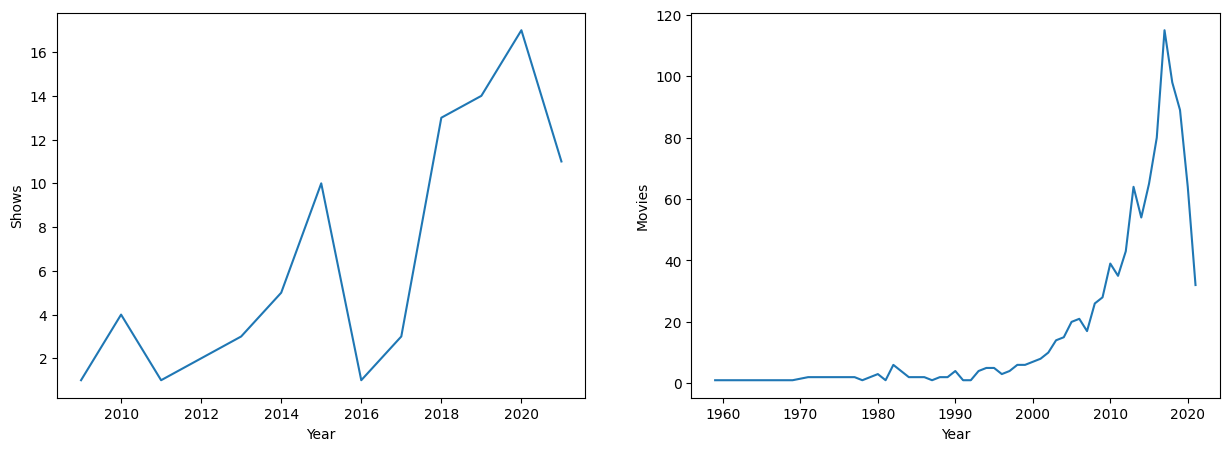

In [ ]:
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)

df_year=df_shows_india.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='release_year', y='title')
plt.ylabel("Shows")
plt.xlabel("Year")


plt.subplot(1,2,2)
df_year=df_movies_india.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='release_year', y='title')
plt.ylabel("Movies")
plt.xlabel("Year")

## There was a downwards trent in release of TV shows in India before 2016 but 2018 onwards there is a upwards trend

## Where as in case of movies the trend of movies released on netflix has increaced after 2000

In [ ]:
#Analyzing best combination of actors and directors
df_movies_india['Actor_Director_Combination'] = df_movies_india["cast"].str.cat(df_movies_india['director'], sep=' and ')
df_movies_india_subset=df_movies_india[df_movies_india['cast']!='Unknown Actor']
df_movies_india_subset=df_movies_india_subset[df_movies_india_subset['director']!='Unknown Director']
df_movies_india_subset.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration,Actor_Director_Combination
641,Jeans,S. Shankar,Prashanth,Comedies,India,s25,Movie,"September 21, 2021",1998,TV-14,150-200,Prashanth and S. Shankar
642,Jeans,S. Shankar,Prashanth,International Movies,India,s25,Movie,"September 21, 2021",1998,TV-14,150-200,Prashanth and S. Shankar
643,Jeans,S. Shankar,Prashanth,Romantic Movies,India,s25,Movie,"September 21, 2021",1998,TV-14,150-200,Prashanth and S. Shankar
644,Jeans,S. Shankar,Aishwarya Rai Bachchan,Comedies,India,s25,Movie,"September 21, 2021",1998,TV-14,150-200,Aishwarya Rai Bachchan and S. Shankar
645,Jeans,S. Shankar,Aishwarya Rai Bachchan,International Movies,India,s25,Movie,"September 21, 2021",1998,TV-14,150-200,Aishwarya Rai Bachchan and S. Shankar


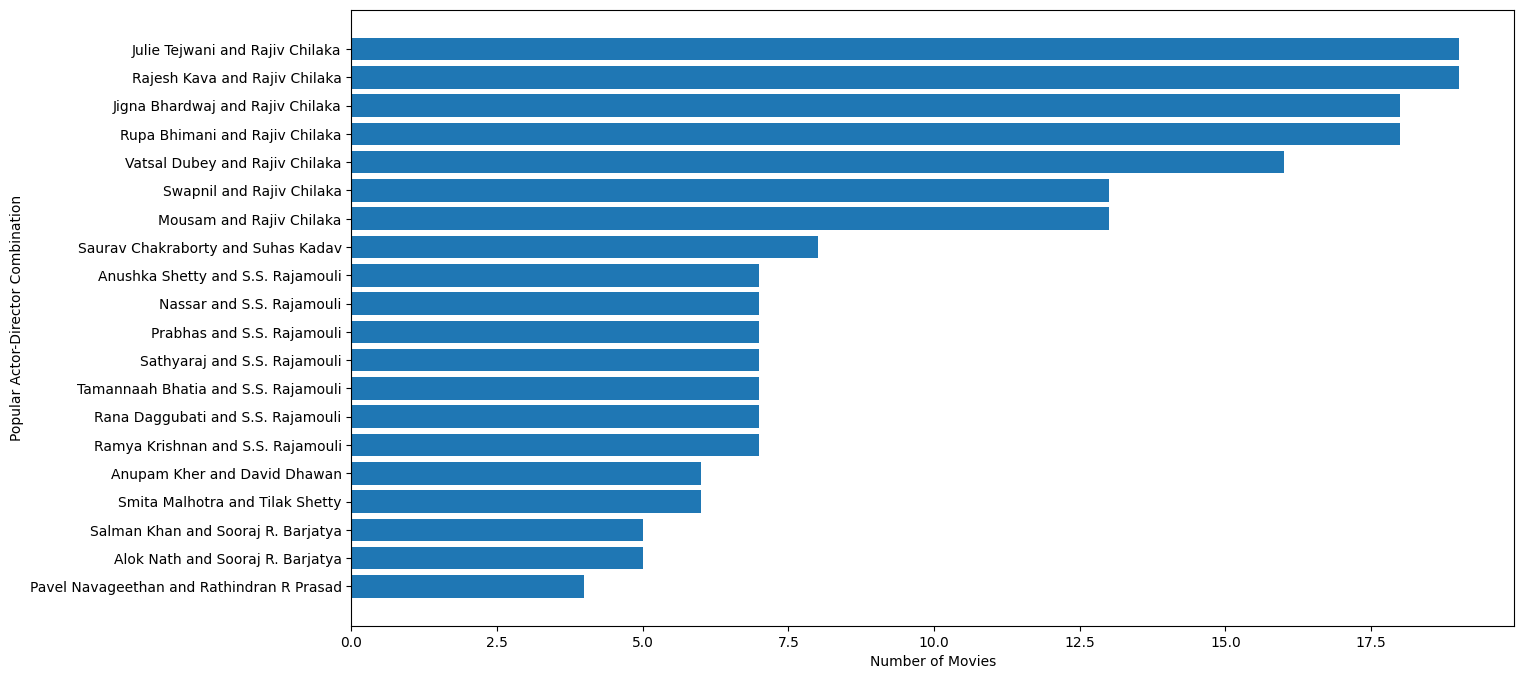

In [ ]:
df_actors_directors=df_movies_india_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

In [ ]:
df_actors_directors[::-1]['Actor_Director_Combination'].values

array(['Pavel Navageethan and Rathindran R Prasad',
       'Alok Nath and Sooraj R. Barjatya',
       'Salman Khan and Sooraj R. Barjatya',
       'Smita Malhotra and Tilak Shetty', 'Anupam Kher and David Dhawan',
       'Ramya Krishnan and S.S. Rajamouli',
       'Rana Daggubati and S.S. Rajamouli',
       'Tamannaah Bhatia and S.S. Rajamouli',
       'Sathyaraj and S.S. Rajamouli', 'Prabhas and S.S. Rajamouli',
       'Nassar and S.S. Rajamouli', 'Anushka Shetty and S.S. Rajamouli',
       'Saurav Chakraborty and Suhas Kadav', 'Mousam and Rajiv Chilaka',
       'Swapnil and Rajiv Chilaka', 'Vatsal Dubey and Rajiv Chilaka',
       'Rupa Bhimani and Rajiv Chilaka',
       'Jigna Bhardwaj and Rajiv Chilaka',
       'Rajesh Kava and Rajiv Chilaka', 'Julie Tejwani and Rajiv Chilaka'],
      dtype=object)

##Recommendations

1) The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies, so content aligning to that is recommended.

2)The target audience in India is recommended to be 14+ and above ratings .

3)Add movies for Indian Audience, it has been declining since 2018.

4) While creating content, take into consideration the popular actors/directors for that country. Also take into account the director-actor combination which is highly recommended.